In [2]:
from __future__ import print_function

import keras
from keras.datasets import mnist
from keras.layers import Dense
from keras.models import Sequential

In [3]:
batch_size = 128
num_classes = 10
epochs = 20

In [4]:
def get_data():
    # the data, shuffled and split between train and test sets
    (x_train, y_train), (x_test, y_test) = mnist.load_data()

    x_train = x_train.reshape(60000, 784)
    x_test = x_test.reshape(10000, 784)
    x_train = x_train.astype('float32')
    x_test = x_test.astype('float32')
    x_train /= 255
    x_test /= 255
    print(x_train.shape[0], 'train samples')
    print(x_test.shape[0], 'test samples')

    # convert class vectors to binary class matrices
    y_train = keras.utils.to_categorical(y_train, num_classes)
    y_test = keras.utils.to_categorical(y_test, num_classes)

    return (x_train, y_train), (x_test, y_test)

In [6]:
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dense(512, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [7]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [8]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [9]:
(x_train, y_train), (x_test, y_test) = get_data()

60000 train samples
10000 test samples


In [11]:
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 16s 270us/step - loss: 0.2138 - acc: 0.9367 - val_loss: 0.1060 - val_acc: 0.9696
Epoch 2/20
60000/60000 [==============================] - 16s 273us/step - loss: 0.0801 - acc: 0.9756 - val_loss: 0.0932 - val_acc: 0.9705
Epoch 3/20
60000/60000 [==============================] - 16s 268us/step - loss: 0.0532 - acc: 0.9831 - val_loss: 0.0647 - val_acc: 0.9798
Epoch 4/20
60000/60000 [==============================] - 19s 312us/step - loss: 0.0348 - acc: 0.9883 - val_loss: 0.0818 - val_acc: 0.9765
Epoch 5/20
60000/60000 [==============================] - 19s 313us/step - loss: 0.0277 - acc: 0.9906 - val_loss: 0.0789 - val_acc: 0.9778
Epoch 6/20
60000/60000 [==============================] - 18s 296us/step - loss: 0.0248 - acc: 0.9919 - val_loss: 0.0759 - val_acc: 0.9788
Epoch 7/20
60000/60000 [==============================] - 18s 296us/step - loss: 0.0186 - acc: 0.9932 - val_loss: 0.

In [15]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.08562931290532397
Test accuracy: 0.9834


In [18]:
score

[0.08562931290532397, 0.9834]

In [19]:
!pip install veusz

In [27]:
import matplotlib.pyplot as plt

In [28]:
%matplotlib inline

In [31]:
print(history.history.keys())

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


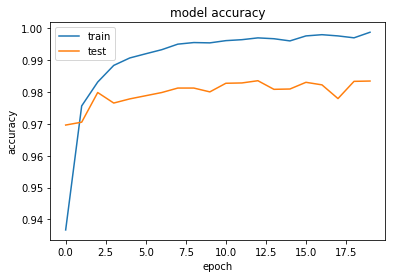

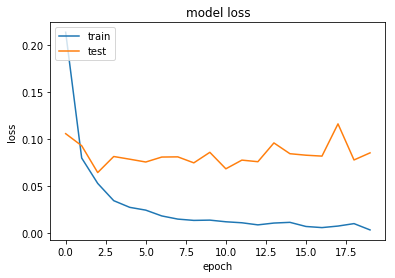

In [32]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Plot loss while tranning

In [35]:
#Both loss and accuracy
class PlotLearning(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.i = 0
        self.x = []
        self.losses = []
        self.val_losses = []
        self.acc = []
        self.val_acc = []
        self.fig = plt.figure()
        
        self.logs = []

    def on_epoch_end(self, epoch, logs={}):
        
        self.logs.append(logs)
        self.x.append(self.i)
        self.losses.append(logs.get('loss'))
        self.val_losses.append(logs.get('val_loss'))
        self.acc.append(logs.get('acc'))
        self.val_acc.append(logs.get('val_acc'))
        self.i += 1
        f, (ax1, ax2) = plt.subplots(1, 2, sharex=True)
        
        clear_output(wait=True)
        
        ax1.set_yscale('log')
        ax1.plot(self.x, self.losses, label="loss")
        ax1.plot(self.x, self.val_losses, label="val_loss")
        ax1.legend()
        
        ax2.plot(self.x, self.acc, label="accuracy")
        ax2.plot(self.x, self.val_acc, label="validation accuracy")
        ax2.legend()
        
        plt.show();
        
plot = PlotLearning()

In [43]:
from IPython.display import clear_output

In [41]:
#only loss
class PlotLosses(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.i = 0
        self.x = []
        self.losses = []
        self.val_losses = []
        
        self.fig = plt.figure()
        
        self.logs = []

    def on_epoch_end(self, epoch, logs={}):
        
        self.logs.append(logs)
        self.x.append(self.i)
        self.losses.append(logs.get('loss'))
        self.val_losses.append(logs.get('val_loss'))
        self.i += 1
        
        clear_output(wait=True)
        plt.plot(self.x, self.losses, label="loss")
        plt.plot(self.x, self.val_losses, label="val_loss")
        plt.legend()
        plt.show();
        
plot_losses = PlotLosses()

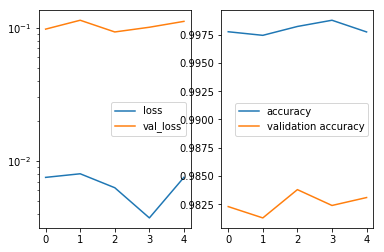

In [44]:
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=5,
                    validation_data=(x_test, y_test),
                    verbose=1,
                    callbacks=[plot])